In [1]:
import network_manipulation as nm
import network_stats as ns
import numpy as np

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

In [2]:
H = nm.build_nxgraph(dataset_paths[0], True)

norm_degrees, norm_weights = ns.analyse_graph(H)
print('Normalised weights')
print(norm_degrees[0:5])
print(norm_weights[0:5])

G = nm.build_nxgraph(dataset_paths[0], False) 

degrees, weights = ns.analyse_graph(G)

print('\n Free weights') # gym joke haha
print(degrees[0:5])
print(weights[0:5])

Normalised weights
[69, 82, 60, 95, 38]
[0.013934426229508197, 0.001639344262295082, 0.000819672131147541, 0.02540983606557377, 0.003278688524590164]

 Free weights
[69, 82, 60, 95, 38]
[17, 2, 1, 31, 4]


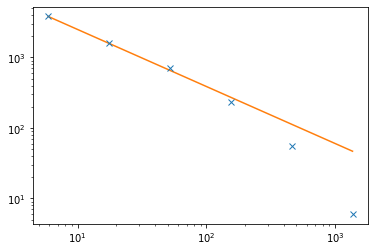

(array([ 1.60159911e+04, -8.08602749e-01]), array([4.26929428, 2.54719899]))

In [3]:
ns.check_fit(ns.weight_func, ns.log_binning, weights, [2.97, False] , False, True, 'log')


In [4]:
(47+35)/2

41.0

In [5]:
scaly = np.arange(1.5, 3.1, 0.1)
ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                  2.8                  4.23


(2.800000000000001, 4.227722840657332)

In [6]:
scaly = np.arange(2.8, 3.0, 0.01)
scale, _ = ns.compare_scale(ns.weight_func, weights, scaly, False, False)

  best scaling factor    best average error
---------------------  --------------------
                 2.97                  3.41


In [9]:
import matplotlib.pyplot as plt

wfit, _ = ns.check_fit(ns.weight_func, ns.log_binning, weights, [scale, False])

sample_dist = ns.weight_distribution(a = 0)
#sample_dist.pdf(fit)
samples = sample_dist.rvs(fit = wfit, size = 2)
samples = np.ceil(samples)
freqs, edegs, _ = plt.hist(samples, bins = 50, density = 0)

TypeError: Value after * must be an iterable, not float

In [ ]:
a =[1, 2, 3, 0]
b = a.index(min(a))
print(b)

3
